# Import Packages

In [ ]:
# Packages
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Dataset 1

## Data Preparation

In [ ]:
df1_init = pd.read_csv('Dataset1_TranscriptMahasiswa.csv', delimiter=';')

In [ ]:
df1 = df1_init.copy()

In [ ]:
# Preview Data
df1.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,EM100 Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,EM180 Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,TI100 Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,TI101 Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,TI110 Pengantar Teknologi Multimedia,3,74.0,B


In [ ]:
df1.tail()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
30865,33849,2018,1821,IS220,Interaksi Manusia dan Komputer,3,26.0,E
30866,33849,2018,1821,IS240,Probabilitas dan Statistik,3,38.0,E
30867,33849,2018,1821,IS251,Perilaku Organisasi,2,49.0,D
30868,33849,2018,1821,IS255,Algoritma dan Struktur Data,4,1.0,E
30869,33849,2018,1821,UM223,Bahasa Inggris 2,2,40.0,E


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  int64  
 1   ANGKATAN  30870 non-null  int64  
 2   SEMESTER  30870 non-null  int64  
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30847 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30318 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.9+ MB


In [ ]:
# Check Missing Values
df1.isnull().sum()

NIM           0
ANGKATAN      0
SEMESTER      0
KODE_MK       0
NAMA_MK      23
SKS           0
NILAI        12
GRADE       552
dtype: int64

Terdapat beberapa *missing-values* untuk kolom NAMA_MK, NILAI, dan juga GRADE

In [ ]:
# Akan dilihat masing-masing missing-values untuk tiap kolom yang terdapat null data
df1_NamaMK = pd.isnull(df1['NAMA_MK'])
df1[df1_NamaMK].head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
442,10110310011,2010,1411,SI863,NaN,6,70.0,B
983,10110310022,2010,1411,SI863,NaN,6,79.0,B+
1528,10110310036,2010,1411,SI863,NaN,6,56.0,C
1626,10110310037,2010,1411,SI863,NaN,6,72.0,B
1919,10110310044,2010,1321,SI863,NaN,6,100.0,A


In [ ]:
df1_Nilai = pd.isnull(df1['NILAI'])
df1[df1_Nilai].head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
18866,9931,2015,1811,IS341,Sistem Basis Data,3,NaN,F
21965,12407,2015,1621,IS432,Pengantar E-Business,3,NaN,F
22633,13019,2016,1821,IS670,Audit Sistem Informasi,3,NaN,F
25920,19365,2017,1811,IS341,Sistem Basis Data,3,NaN,F
26030,19601,2017,1721,IS201,Proses Bisnis Korporat,3,NaN,F


In [ ]:
df1_Grade = pd.isnull(df1['GRADE'])
df1[df1_Grade].head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
10,10110310002,2010,1021,SI214,SI214 Manajemen Operasional,3,71.0,NaN
16,10110310002,2010,1111,SI301,SI301 Sistem Informasi Manajemen,3,89.0,NaN
32,10110310002,2010,1211,SI527,SI527 Enterprise Resource Planning,3,73.0,NaN
53,10110310004,2010,1021,EM201,Dasar-dasar Manajemen,3,58.0,NaN
68,10110310004,2010,1121,TI403,Sistem Basis Data,4,72.0,NaN


In [ ]:
# Handling Missing Values

# NAMA MK
for i in range(len(df1.KODE_MK)):
  if df1.KODE_MK[i] == 'SI863' :
    df1.NAMA_MK[i] = 'Tugas akhir'

# Nilai
df1 = df1.dropna(subset=['NILAI']).reset_index(drop=True)

# Filling Grade that contains NA
for i in range(len(df1.GRADE)):
  if df1.NILAI[i] >= 85 :
    df1.GRADE[i] = 'A'
  elif 80 <= df1.NILAI[i] < 85 :
    df1.GRADE[i] = 'A-'
  elif 75 <= df1.NILAI[i] < 80 :
    df1.GRADE[i] = 'B+'
  elif 70 <= df1.NILAI[i] < 75 :
    df1.GRADE[i] = 'B'
  elif 65 <= df1.NILAI[i] < 70 :
    df1.GRADE[i] = 'B-'
  elif 60 <= df1.NILAI[i] < 65 :
    df1.GRADE[i] = 'C+'
  elif 55 <= df1.NILAI[i] < 60 :
    df1.GRADE[i] = 'C'
  elif 45 <= df1.NILAI[i] < 55 :
    df1.GRADE[i] = 'D'
  elif 0 <= df1.NILAI[i] < 45 :
    df1.GRADE[i] = 'E'
  else :
    df1.GRADE[i] = 'F'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to

Amati, dari bagian preview data dapat dilihat bawa untuk kolom NIM terdapat NIM yang belum lengkap dan juga pada kolom NAMA_MK terdapat kode mk sehingga penulisan tidak konsisten

In [ ]:
# Fixing NIM
for i in range(len(df1.NIM)):
  if len(str(df1.NIM[i])) != 11 :
    if len(str(df1.NIM[i])) == 5 :
      str_angkatan = str(df1.ANGKATAN[i])
      df1.NIM[i] = str_angkatan[2:] + '11031' + str(df1.NIM[i])
    elif len(str(df1.NIM[i])) == 4 :
      str_angkatan = str(df1.ANGKATAN[i])
      df1.NIM[i] = str_angkatan[2:] + '110310' + str(df1.NIM[i])

# Fixing Nama_MK
for i in range(len(df1.NAMA_MK)):
  df1.NAMA_MK[i]= df1.NAMA_MK[i].replace(df1.KODE_MK[i],'')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
# Re-Preview Data
df1.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,Pengantar Teknologi Multimedia,3,74.0,B


In [ ]:
df1.tail()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
30853,181103133849,2018,1821,IS220,Interaksi Manusia dan Komputer,3,26.0,E
30854,181103133849,2018,1821,IS240,Probabilitas dan Statistik,3,38.0,E
30855,181103133849,2018,1821,IS251,Perilaku Organisasi,2,49.0,D
30856,181103133849,2018,1821,IS255,Algoritma dan Struktur Data,4,1.0,E
30857,181103133849,2018,1821,UM223,Bahasa Inggris 2,2,40.0,E


In [ ]:
# Check duplicates data
df1[df1.duplicated(['NIM', 'KODE_MK'])]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
346,10110310011,2010,1011,EM100,Dasar-dasar Bisnis,3,74.0,B
348,10110310011,2010,1011,EM180,Matematika Bisnis,3,74.0,B
350,10110310011,2010,1011,TI100,Algoritma dan Pemrograman,4,74.0,B
352,10110310011,2010,1011,TI101,Matematika Diskrit,3,73.0,B
354,10110310011,2010,1011,TI110,Pengantar Teknologi Multimedia,3,74.0,B
...,...,...,...,...,...,...,...,...
6876,11110310080,2011,1411,SI725,Knowledge Management,3,79.0,B+
6878,11110310080,2011,1411,SI729,Sistem dan Aplikasi Perusahaan 3,3,84.0,A-
6880,11110310080,2011,1411,SI860,Magang Kerja,4,90.0,A
6882,11110310080,2011,1411,SI863,Tugas akhir,6,78.0,B+


In the data, it can be seen that there are some data that have duplicates. So, we will try to remove that.

In [ ]:
# Drop duplicates
df1.drop_duplicates(subset=['NIM', 'KODE_MK'], keep = 'first', inplace = True)

In [ ]:
# Re-Check
df1[df1.duplicated(['NIM', 'KODE_MK'])]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE


In [ ]:
df1.head()

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE
0,10110310002,2010,1011,EM100,Dasar-dasar Bisnis,3,57.0,C
1,10110310002,2010,1011,EM180,Matematika Bisnis,3,70.0,B
2,10110310002,2010,1011,TI100,Algoritma dan Pemrograman,4,57.0,C
3,10110310002,2010,1011,TI101,Matematika Diskrit,3,59.0,C
4,10110310002,2010,1011,TI110,Pengantar Teknologi Multimedia,3,74.0,B


In [ ]:
df1 = df1.reset_index(drop=True)

In [ ]:
# Creating Dummy Data

# Adding column for BOBOT
Bobot = []
Grade = df1.GRADE
for i in range(len(df1.GRADE)) :
  if Grade[i] == 'A' :
    Bobot.append(4.0)
  elif Grade[i] == 'A-' :
    Bobot.append(3.7)
  elif Grade[i] == 'B+' :
    Bobot.append(3.3)
  elif Grade[i] == 'B' :
    Bobot.append(3.0)
  elif Grade[i] == 'B-' :
    Bobot.append(2.7)
  elif Grade[i] == 'C+' :
    Bobot.append(2.3)
  elif Grade[i] == 'C' :
    Bobot.append(2.0)
  elif Grade[i] == 'D' :
    Bobot.append(1.0)
  else :
    Bobot.append(0)

df1["BOBOT"] = Bobot

In [ ]:
# Adding column for NILAI_AKHIR
Nilai_Akhir = []
for i in range(len(df1.NILAI)) :
    Nilai_Akhir.append(df1.SKS[i] * df1.BOBOT[i])

df1["NILAI_AKHIR"] = Nilai_Akhir

To make it easier, a new dataframe will be defined which is a copy of reconstructed dataframe

In [ ]:
tes = df1.copy()

In [ ]:
tes['NIM'] = tes['NIM'].astype(str)

In [ ]:
# IPK will be searched for every student
smt = tes.SEMESTER.unique()
perSmt = []

for k in smt:
    Z =  tes.loc[tes.SEMESTER == k]
    perSmt.append(Z.groupby('NIM').sum())

    for i in range(len(perSmt)):
        perSmt[i]['IPS ' + str(smt[i])] = perSmt[i]['NILAI_AKHIR'] / perSmt[i]['SKS']

In [ ]:
deletes = ['ANGKATAN', 'SEMESTER','SKS', 'NILAI','BOBOT', 'NILAI_AKHIR']
for i in range(len(perSmt)):
    for dels in deletes:
       del perSmt[i][dels]

In [ ]:
# Merged Dataframe
concatSMT = pd.concat([perSmt[i] for i in range(len(perSmt))], axis = 1)

In [ ]:
# Preview Data
concatSMT.head()

,IPS 1011,IPS 1021,IPS 1111,IPS 1121,IPS 1211,IPS 1221,IPS 1311,IPS 1321,IPS 1322,IPS 1122,...,IPS 1611,IPS 1711,IPS 1721,IPS 1722,IPS 1522,IPS 1821,IPS 1811,IPS 1622,IPS 1822,IPS 1911
NIM,,,,,,,,,,,,,,,,,,,,,
10110310002,2.428571,2.380952,3.333333,2.555556,2.714286,3.571429,3.062500,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10110310004,2.230769,2.263158,3.000000,3.066667,3.000000,2.950000,3.294118,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10110310005,3.714286,3.476190,3.904762,3.619048,3.714286,3.857143,3.538462,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10110310006,2.571429,2.523810,2.952381,2.571429,2.857143,3.571429,3.538462,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10110310007,2.666667,2.142857,3.000000,2.777778,2.714286,3.619048,3.062500,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
concatSMT.tail()

,IPS 1011,IPS 1021,IPS 1111,IPS 1121,IPS 1211,IPS 1221,IPS 1311,IPS 1321,IPS 1322,IPS 1122,...,IPS 1611,IPS 1711,IPS 1721,IPS 1722,IPS 1522,IPS 1821,IPS 1811,IPS 1622,IPS 1822,IPS 1911
NIM,,,,,,,,,,,,,,,,,,,,,
181103133603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.370,2.535000,NaN,NaN,NaN
181103133607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.225,2.635294,NaN,3.3,NaN
181103133657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.045,3.345000,NaN,NaN,NaN
181103133708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.855,2.860000,NaN,NaN,NaN
181103133849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.100,1.550000,NaN,NaN,NaN


In [ ]:
# Transpose Dataframe
smtTrans = concatSMT.transpose()

In [ ]:
smtTrans.head()

NIM,10110310002,10110310004,10110310005,10110310006,10110310007,10110310008,10110310009,10110310011,10110310012,10110310013,...,181103133360,181103133371,181103133461,181103133583,181103133587,181103133603,181103133607,181103133657,181103133708,181103133849
IPS 1011,2.428571,2.230769,3.714286,2.571429,2.666667,2.333333,2.888889,2.857143,2.380952,2.470588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IPS 1021,2.380952,2.263158,3.476190,2.523810,2.142857,2.333333,3.523810,3.166667,2.444444,2.190476,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IPS 1111,3.333333,3.000000,3.904762,2.952381,3.000000,2.944444,3.478261,2.937500,2.777778,2.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IPS 1121,2.555556,3.066667,3.619048,2.571429,2.777778,2.533333,3.416667,3.476190,2.666667,2.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IPS 1211,2.714286,3.000000,3.714286,2.857143,2.714286,2.833333,3.571429,3.166667,2.857143,2.714286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
smtTrans.tail()

NIM,10110310002,10110310004,10110310005,10110310006,10110310007,10110310008,10110310009,10110310011,10110310012,10110310013,...,181103133360,181103133371,181103133461,181103133583,181103133587,181103133603,181103133607,181103133657,181103133708,181103133849
IPS 1821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.290,1.575,0.00,2.655,1.930,2.370,2.225000,3.045,2.855,0.10
IPS 1811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.235,1.990,0.95,3.090,1.725,2.535,2.635294,3.345,2.860,1.55
IPS 1622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IPS 1822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.300000,NaN,NaN,NaN
IPS 1911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check Missing Values
smtTrans.isnull().sum()

NIM
10110310002     19
10110310004     16
10110310005     20
10110310006     20
10110310007     20
                ..
181103133603    26
181103133607    25
181103133657    26
181103133708    26
181103133849    26
Length: 770, dtype: int64

Since in total there are 28 Semester, this mean that for each NIM they took (28 - null values) semester

In [ ]:
# Number of Semester and Sum of their IPS
NIM = tes.NIM.unique()
num_sem = [smtTrans[(NIM[i])].dropna().count() for i in range(len(NIM))]
sumSMT =  [smtTrans[NIM[i]].dropna().sum() for i in range(len(NIM))]
IPK = []
for i in range(len(num_sem)):
    IPK.append(sumSMT[i] / num_sem[i])

In [ ]:
# Creating new colum
concatSMT['Number of Semester'] = num_sem

In [ ]:
# Grouping data from tes dataframes by NIM
by_NIM = tes.groupby('NIM').sum()
delete = ['ANGKATAN', 'SEMESTER']
for k in delete:
    del by_NIM[k]

In [ ]:
by_NIM['Number of Semester'] = num_sem
by_NIM['IPK'] = IPK

In [ ]:
# Preview Data
by_NIM.head()

,SKS,NILAI,BOBOT,NILAI_AKHIR,Number of Semester,IPK
NIM,,,,,,
10110310002,145,3505.0,140.0,417.0,9,2.782959
10110310004,145,3673.0,146.3,420.6,12,2.983726
10110310005,145,4275.0,181.0,538.0,8,3.728022
10110310006,145,3564.0,144.0,428.0,8,3.073260
10110310007,145,3424.0,139.0,414.0,8,2.872892


In [ ]:
by_NIM.tail()

,SKS,NILAI,BOBOT,NILAI_AKHIR,Number of Semester,IPK
NIM,,,,,,
181103133603,40,927.0,35.7,98.1,2,2.452500
181103133607,40,915.0,35.4,99.2,3,2.720098
181103133657,40,1087.0,45.5,127.8,2,3.195000
181103133708,40,1001.0,40.8,114.3,2,2.857500
181103133849,40,518.0,13.0,33.0,2,0.825000


In [ ]:
by_NIM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 770 entries, 10110310002 to 181103133849
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SKS                 770 non-null    int64  
 1   NILAI               770 non-null    float64
 2   BOBOT               770 non-null    float64
 3   NILAI_AKHIR         770 non-null    float64
 4   Number of Semester  770 non-null    int64  
 5   IPK                 770 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 42.1+ KB


In [ ]:
by_NIM.IPK.describe()

count    770.000000
mean       2.950760
std        0.626303
min        0.000000
25%        2.663400
50%        3.072024
75%        3.359666
max        4.000000
Name: IPK, dtype: float64

In [ ]:
# Define the pass criteria, namely when they have completed a minimum of 144 SKS with IPK>2.5
lulus = by_NIM.loc[(by_NIM['SKS'] >= 144) & (by_NIM['IPK'] > 2.5)]

In [ ]:
lulus.loc[(lulus['Number of Semester'] < 8)].head(5)

,SKS,NILAI,BOBOT,NILAI_AKHIR,Number of Semester,IPK
NIM,,,,,,
10110310016,145,4153.0,176.0,519.0,7,3.580738
10110310021,145,3985.0,169.0,500.0,7,3.453634
10110310024,145,3889.0,165.0,490.0,7,3.385607
10110310053,145,3732.0,155.0,458.0,7,3.161475
10110310061,145,3913.0,166.0,491.0,7,3.409952


'KELULUSAN' column will be created where there are 3 possibilities, 'TEPAT WAKTU', 'TELAT', and 'CEPAT'. The terms of 'KELULUSAN' are as follows:
*  'TEPAT WAKTU' if 'Number of Semeter' = 8
*  'TELAT' if 'Number of Semester' > 8
*  'CEPAT' if 'Number of Semester' < 8


In [ ]:
kelulusan = []
for i in range(len(lulus['Number of Semester'])):
    if lulus['Number of Semester'][i] == 8:
        kelulusan.append('TEPAT WAKTU')

    elif lulus['Number of Semester'][i] > 8:
        kelulusan.append('TELAT')

    else:
        kelulusan.append('CEPAT')

lulus['KELULUSAN'] = kelulusan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# Cleaning the DataFrame
deleted = ['NILAI', 'BOBOT', 'NILAI_AKHIR']
for k in deleted:
    del lulus[k]

In [ ]:
lulusSmt = lulus.copy()

In [ ]:
lulus.head()

,SKS,Number of Semester,IPK,KELULUSAN
NIM,,,,
10110310002,145,9,2.782959,TELAT
10110310004,145,12,2.983726,TELAT
10110310005,145,8,3.728022,TEPAT WAKTU
10110310006,145,8,3.073260,TEPAT WAKTU
10110310007,145,8,2.872892,TEPAT WAKTU


In [ ]:
lulusSmt.drop('Number of Semester', axis = 1, inplace = True)

## Data Exploration

[Text(0.5, 1.0, 'Distribution of Grade')]

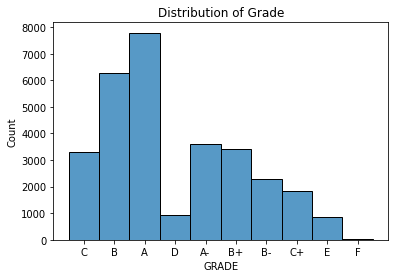

In [ ]:
sns.histplot(df1_init.GRADE).set(title='Distribution of Grade')

[Text(0.5, 1.0, 'Distribution of Grade')]

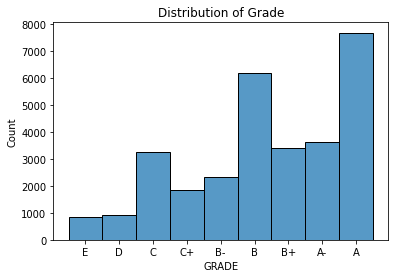

In [ ]:
sort_grade = df1.sort_values(by=['BOBOT'])
sns.histplot(sort_grade.GRADE).set(title='Distribution of Grade')

In [ ]:
grade_prob = ['D','E','F']
count_grade = []
for i in grade_prob :
  print('Jumlah yang memperoleh grade '+str(i),'=',(df1_init.loc[(df1_init.GRADE == i)].GRADE.count()))

Jumlah yang memperoleh grade D = 930
Jumlah yang memperoleh grade E = 852
Jumlah yang memperoleh grade F = 12


In [ ]:
px.histogram(df1_init.loc[(df1_init.GRADE == 'D') | (df1_init.GRADE == 'E') | (df1_init.GRADE == 'F')]['NAMA_MK'], x = 'NAMA_MK')

In [ ]:
# Because students who have grades D, E, or F don't pass, so we will look for courses that give the most grades D, E, and F
mk_DEF = df1_init.loc[(df1_init.GRADE == 'D') | (df1_init.GRADE == 'E') | (df1_init.GRADE == 'F')]
count_mk_DEF = pd.DataFrame((mk_DEF.GRADE.groupby(mk_DEF.NAMA_MK)).count())
count_mk_DEF.sort_values(by=['GRADE'],ascending=False).head(10)

,GRADE
NAMA_MK,
Pengantar Akuntansi 1,218
Algoritma dan Struktur Data,108
Konsep Sistem Operasi,104
Matematika Bisnis,104
Algoritma dan Pemrograman,91
Jaringan Komputer,85
Pemrograman Visual,70
Matematika Diskrit,66
Probabilitas dan Statistik,55


In [ ]:
# Descriptive statistics of IPK from by_NIM
by_NIM.IPK.describe()

count    770.000000
mean       2.950760
std        0.626303
min        0.000000
25%        2.663400
50%        3.072024
75%        3.359666
max        4.000000
Name: IPK, dtype: float64

In [ ]:
# Visualization of the distribution of IPK
px.histogram(by_NIM['IPK'],
            marginal='box', x = 'IPK')

In [ ]:
# The number of students whose IPK is at the lower outlier category
by_NIM.loc[by_NIM.IPK < 1.6269].count()

SKS                   30
NILAI                 30
BOBOT                 30
NILAI_AKHIR           30
Number of Semester    30
IPK                   30
dtype: int64

In [ ]:
by_NIM.SKS.describe()

count    770.000000
mean     110.718182
std       41.120867
min       37.000000
25%       82.000000
50%      134.000000
75%      145.000000
max      148.000000
Name: SKS, dtype: float64

In [ ]:
# Statistik Deskriptif dari mahasiswa yang lulus
lulus.describe()

,SKS,Number of Semester,IPK
count,351.000000,351.000000,351.000000
mean,144.888889,8.814815,3.262716
std,0.567367,1.510878,0.328941
min,144.000000,7.000000,2.550007
25%,145.000000,8.000000,3.033007
50%,145.000000,8.000000,3.252656
75%,145.000000,9.000000,3.490814
max,148.000000,15.000000,4.000000


In [ ]:
lulus.loc[lulus.SKS==148]

,SKS,Number of Semester,IPK,KELULUSAN
NIM,,,,
10110310032,148,13,2.923312,TELAT
13110310073,148,13,2.567007,TELAT


In [ ]:
lulus.loc[lulus['Number of Semester']==15]

,SKS,Number of Semester,IPK,KELULUSAN
NIM,,,,
11110310084,145,15,2.660105,TELAT


In [ ]:
lulus.loc[lulus['Number of Semester']==7].describe()

,SKS,Number of Semester,IPK
count,34.000000,34.0,34.000000
mean,144.882353,7.0,3.514322
std,0.327035,0.0,0.209008
min,144.000000,7.0,3.120551
25%,145.000000,7.0,3.411629
50%,145.000000,7.0,3.508050
75%,145.000000,7.0,3.616298
max,145.000000,7.0,3.990683


In [ ]:
# Highest IPK and pass
by_NIM.loc[(by_NIM['IPK'] == by_NIM['IPK'].max())]

,SKS,NILAI,BOBOT,NILAI_AKHIR,Number of Semester,IPK
NIM,,,,,,
12110310024,145,4649.0,200.0,580.0,8,4.0


In [ ]:
# Lowest IPK and pass
by_NIM.loc[(by_NIM['SKS'] >= 144)].tail()

,SKS,NILAI,BOBOT,NILAI_AKHIR,Number of Semester,IPK
NIM,,,,,,
151103112265,145,4038.0,174.5,498.0,8,3.487140
151103112381,145,3997.0,168.2,479.8,8,3.362219
151103112575,145,4196.0,182.2,520.2,8,3.631727
151103112700,145,4155.0,178.5,509.7,8,3.550638
151103112724,146,3925.0,162.8,466.2,9,3.161487


In [ ]:
# IPK histograms of students who have >= 144 SKS (or pass)
px.histogram(lulus['IPK'],
            marginal='box', x = 'IPK')

In [ ]:
kategori = ['CEPAT',"TEPAT WAKTU", 'TELAT']
for i in kategori:
  print('jumlah mahasiswa yang lulus '+str(i),'=',lulus.loc[lulus.KELULUSAN==i].KELULUSAN.count())

jumlah mahasiswa yang lulus CEPAT = 34
jumlah mahasiswa yang lulus TEPAT WAKTU = 164
jumlah mahasiswa yang lulus TELAT = 153


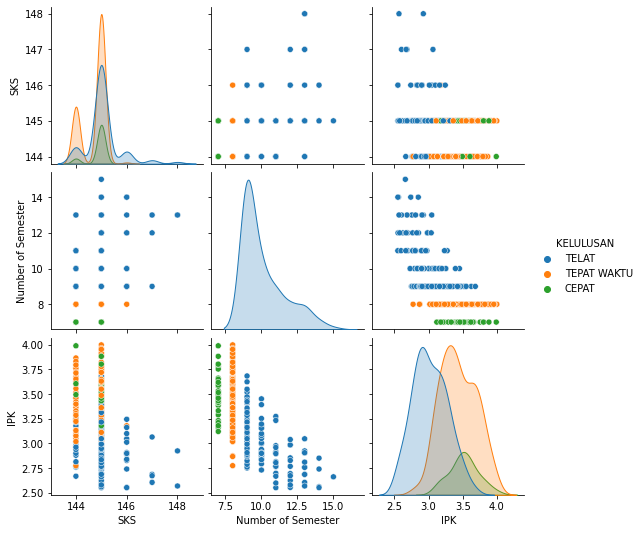

In [ ]:
sns.pairplot(lulus, hue = 'KELULUSAN')

# Modelling 1

In [ ]:
lulusSmt = lulus.copy()

In [ ]:
lulusSmt.head()

,SKS,Number of Semester,IPK,KELULUSAN
NIM,,,,
10110310002,145,9,2.782959,TELAT
10110310004,145,12,2.983726,TELAT
10110310005,145,8,3.728022,TEPAT WAKTU
10110310006,145,8,3.073260,TEPAT WAKTU
10110310007,145,8,2.872892,TEPAT WAKTU


In [ ]:
lulusSmt = lulusSmt.drop('Number of Semester',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
lulusSmt.head()

,SKS,IPK,KELULUSAN
NIM,,,
10110310002,145,2.782959,TELAT
10110310004,145,2.983726,TELAT
10110310005,145,3.728022,TEPAT WAKTU
10110310006,145,3.073260,TEPAT WAKTU
10110310007,145,2.872892,TEPAT WAKTU


In [ ]:
# Train Test Split
lulus.KELULUSAN.value_counts()

TEPAT WAKTU    164
TELAT          153
CEPAT           34
Name: KELULUSAN, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = lulusSmt.drop('KELULUSAN', axis = 1)
y = lulusSmt['KELULUSAN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Prediction and Evaluation
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

       CEPAT       0.09      0.08      0.09        12
       TELAT       0.58      0.75      0.65        40
 TEPAT WAKTU       0.63      0.50      0.56        54

    accuracy                           0.55       106
   macro avg       0.43      0.44      0.43       106
weighted avg       0.55      0.55      0.54       106

[[ 1  4  7]
 [ 1 30  9]
 [ 9 18 27]]


In [ ]:
# RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [ ]:
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

       CEPAT       0.09      0.08      0.09        12
       TELAT       0.58      0.75      0.65        40
 TEPAT WAKTU       0.63      0.50      0.56        54

    accuracy                           0.55       106
   macro avg       0.43      0.44      0.43       106
weighted avg       0.55      0.55      0.54       106

[[ 1  4  7]
 [ 1 30  9]
 [ 9 18 27]]


# Dataset 2

## Data Preparation

In [ ]:
df2_init = pd.read_csv('Dataset2_EvaluasiDosenPerMK.csv', delimiter=';')

In [ ]:
df2 = df2_init.copy()

In [ ]:
# Preview data
df2.head()

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI
0,2015,1511,IS100 Management Information Systems,1,Kesiapan memberikan perkuliahan/praktikum,"3,28"
1,2015,1511,IS100 Management Information Systems,2,Upaya menyampaikan materi perkuliahan/praktik...,"3,25"
2,2015,1511,IS100 Management Information Systems,3,Sistematis dalam menyampaikan materi perkuliah...,"3,24"
3,2015,1511,IS100 Management Information Systems,4,Kemampuan memberikan contoh yang relevan dari ...,"3,30"
4,2015,1511,IS100 Management Information Systems,5,Penyampaian materi perkuliahan sesuai dengan k...,"3,27"


In [ ]:
df2.tail()

,TAHUN,SEMESTER,MATAKULIAH,PERTANYAAN,KETERANGAN,NILAI
2109,2018,1821,IS726 Innovation in Information and Technology,10,Pemberian tugas/kuis serta pembahasannya di kelas,"3,45"
2110,2018,1821,IS726 Innovation in Information and Technology,11,Kemampuan memotivasi semangat belajar mahasiswa,"3,41"
2111,2018,1821,IS726 Innovation in Information and Technology,12,"Kemampuan menerima kritik, saran dan pendapat","3,48"
2112,2018,1821,IS726 Innovation in Information and Technology,13,Fairness dalam memberikan penilaian,"3,49"
2113,2018,1821,IS726 Innovation in Information and Technology,14,Ketepatan waktu dalam memulai dan mengakhiri p...,"3,48"


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TAHUN       2114 non-null   int64 
 1   SEMESTER    2114 non-null   int64 
 2   MATAKULIAH  2114 non-null   object
 3   PERTANYAAN  2114 non-null   int64 
 4   KETERANGAN  2114 non-null   object
 5   NILAI       2114 non-null   object
dtypes: int64(3), object(3)
memory usage: 99.2+ KB


In [ ]:
# Check Missing Values
df2.isnull().sum()

TAHUN         0
SEMESTER      0
MATAKULIAH    0
PERTANYAAN    0
KETERANGAN    0
NILAI         0
dtype: int64

There are no *missing values* in Dataset 2


In [ ]:
# Fixing NILAI column
df2_1 = df2['NILAI'].apply(lambda x: x.replace(',','.'))
df2_1 = df2_1.astype(float)
df2_float = pd.DataFrame(df2)
df2_float["NILAI"] = df2_1

In [ ]:
df2_float=df2

In [ ]:
# Split Kode Matkul and Nama Matkul

new = df2["MATAKULIAH"].str.split(" ", n = 1, expand = True)

# Making separate first name column from new data frame
df2["KODE_MK"]= new[0]

# Making separate last name column from new data frame
df2["NAMA_MK"]= new[1]

# Dropping old Name columns
df2.drop(columns =["MATAKULIAH"], inplace = True)

df2.head()

,TAHUN,SEMESTER,PERTANYAAN,KETERANGAN,NILAI,KODE_MK,NAMA_MK
0,2015,1511,1,Kesiapan memberikan perkuliahan/praktikum,3.28,IS100,Management Information Systems
1,2015,1511,2,Upaya menyampaikan materi perkuliahan/praktik...,3.25,IS100,Management Information Systems
2,2015,1511,3,Sistematis dalam menyampaikan materi perkuliah...,3.24,IS100,Management Information Systems
3,2015,1511,4,Kemampuan memberikan contoh yang relevan dari ...,3.30,IS100,Management Information Systems
4,2015,1511,5,Penyampaian materi perkuliahan sesuai dengan k...,3.27,IS100,Management Information Systems


Based on UU number 14 of 2005 chapter 1 article 1 paragraph 2, lecturers are professional educators and scientists with the main task of transforming, developing, and disseminating science, technology, and art through education, research, and community service.

According to that statements, we formulate the quality of lecturers by only taking a few questions from the assessement that are relevant to UU number 14 of 2005.

First, we will look for the average question score for every course. Then, the total average for every course will be sought as an indicator of the quality of lecturers quantitatively.

In [ ]:
# Select several questions that are used for analysis
Pertanyaan_del = [3,5,6,7,10,14]
for i in range(len(df2.PERTANYAAN)):
    if df2.PERTANYAAN[i] in Pertanyaan_del :
        df2 = df2.drop(i)
df2 = df2.reset_index(drop=True)

In [ ]:
# Remove some unnecessary columns
del_columns = ['TAHUN','KETERANGAN','NAMA_MK']
for col in del_columns :
    df2 = df2.drop(col,1)
df2 = df2[['SEMESTER','KODE_MK','PERTANYAAN','NILAI']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
test = df2.copy()
test_group = test.groupby('KODE_MK')

In [ ]:
# Preview Data
test_group.first().head()

,SEMESTER,PERTANYAAN,NILAI
KODE_MK,,,
IS100,1511,1,3.28
IS110,1511,1,3.19
IS155,1811,1,3.44
IS201,1511,1,3.27
IS220,1521,1,3.26


In [ ]:
mk_list = test.KODE_MK.unique()
mean_perMK =[]
for mk in mk_list :
    group_mk = test_group.get_group(mk)
    mean_perMK.append(group_mk.groupby('PERTANYAAN').mean().round(2))

for i in range(len(mean_perMK)):
    mean_perMK[i] = pd.DataFrame(mean_perMK[i])
    mean_perMK[i] = mean_perMK[i].drop('SEMESTER',1)
    mean_perMK[i].columns = [str(mk_list[i])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
concatMK = pd.concat([mean_perMK[i] for i in range(len(mean_perMK))], axis = 1)
concatMK

,IS100,IS110,IS201,IS230,IS302,IS321,IS341,IS403,IS422,IS432,...,IS228,IS155,IS355,IS388,IS555,IS556,IS557,IS749,IS255,IS655
PERTANYAAN,,,,,,,,,,,,,,,,,,,,,
1,3.46,3.11,3.36,3.25,2.86,3.35,3.20,3.32,3.18,3.24,...,3.53,3.44,3.24,3.38,3.40,3.28,3.55,3.40,2.77,3.52
2,3.38,2.99,3.30,3.15,2.80,3.29,3.21,3.28,3.12,3.21,...,3.51,3.41,3.14,3.35,3.38,3.22,3.50,3.33,2.63,3.52
4,3.47,3.06,3.31,3.19,2.84,3.36,3.19,3.30,3.23,3.21,...,3.49,3.44,3.17,3.31,3.39,3.22,3.58,3.34,2.62,3.48
8,3.39,3.14,3.27,3.21,2.90,3.32,3.21,3.30,3.21,3.23,...,3.49,3.40,3.16,3.34,3.36,3.24,3.60,3.33,2.69,3.52
9,3.29,3.05,3.25,3.15,2.84,3.29,3.19,3.27,3.12,3.24,...,3.52,3.40,3.14,3.34,3.34,3.22,3.55,3.36,2.64,3.48
11,3.38,2.68,3.26,3.10,2.76,3.32,3.14,3.27,3.18,3.24,...,3.52,3.40,3.04,3.29,3.36,3.12,3.52,3.34,2.58,3.46
12,3.36,3.10,3.27,3.15,2.86,3.31,3.18,3.29,3.24,3.25,...,3.48,3.40,3.13,3.30,3.35,3.18,3.50,3.40,2.58,3.46
13,3.37,3.13,3.32,3.12,2.82,3.31,3.23,3.32,3.20,3.24,...,3.53,3.43,3.04,3.31,3.39,3.12,3.52,3.39,2.63,3.41


In [ ]:
concatMK_trans = concatMK.transpose()
concatMK_trans.rename(columns = {'PERTANYAAN':'KODE_MK'}, inplace = True)
concatMK_trans.head()

PERTANYAAN,1,2,4,8,9,11,12,13
IS100,3.46,3.38,3.47,3.39,3.29,3.38,3.36,3.37
IS110,3.11,2.99,3.06,3.14,3.05,2.68,3.10,3.13
IS201,3.36,3.30,3.31,3.27,3.25,3.26,3.27,3.32
IS230,3.25,3.15,3.19,3.21,3.15,3.10,3.15,3.12
IS302,2.86,2.80,2.84,2.90,2.84,2.76,2.86,2.82


In [ ]:
mean_total = []
for i in mk_list :
    mean_total.append(round(concatMK[i].mean(),2))

In [ ]:
dfix = pd.DataFrame(mk_list)
dfix.columns = ['KODE_MK']
dfix['NILAI'] = mean_total
dfix.head()

,KODE_MK,NILAI
0,IS100,3.39
1,IS110,3.03
2,IS201,3.29
3,IS230,3.17
4,IS302,2.83


In [ ]:
df2.head()

,KODE_MK,NILAI
0,IS100,3.39
1,IS110,3.03
2,IS201,3.29
3,IS230,3.17
4,IS302,2.83


## Data Exploration

In [ ]:
# Distribution of NILAI for every course
px.histogram(df2_init.NILAI.sort_values(),
            marginal='box')

In [ ]:
df2.NILAI.groupby(df2.PERTANYAAN).describe().reset_index()

,PERTANYAAN,count,mean,std,min,25%,50%,75%,max
0,1,151.0,3.324768,0.265279,2.17,3.200,3.35,3.470,4.0
1,2,151.0,3.295629,0.290890,2.17,3.150,3.33,3.460,4.0
2,4,151.0,3.318079,0.269371,2.25,3.180,3.33,3.455,4.0
3,8,151.0,3.335960,0.243612,2.42,3.210,3.33,3.470,4.0
4,9,151.0,3.299868,0.267290,2.25,3.140,3.30,3.430,4.0
5,11,151.0,3.286556,0.310951,2.00,3.115,3.31,3.425,4.0
6,12,151.0,3.310464,0.261308,2.29,3.175,3.33,3.450,4.0
7,13,151.0,3.325166,0.263438,2.25,3.195,3.33,3.450,4.0


In [ ]:
sort_nilai2 = df2.sort_values(by=['NILAI'],ascending = False).head(10)

[Text(0.5, 1.0, 'Distribution Data of Q1')]

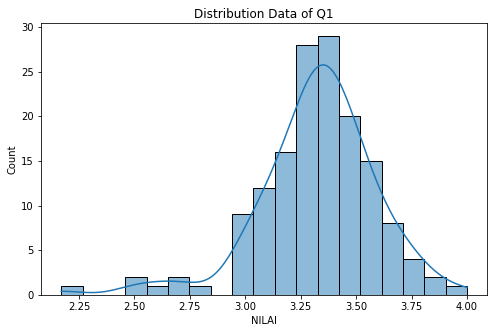

In [ ]:
# For Q1
fig=plt.figure(figsize=(8, 5))
z = df2.loc[df2.PERTANYAAN==1]
sns.histplot(z.NILAI, kde=True).set(title='Distribution Data of Q1')

[Text(0.5, 1.0, 'Distribution Data of Q2')]

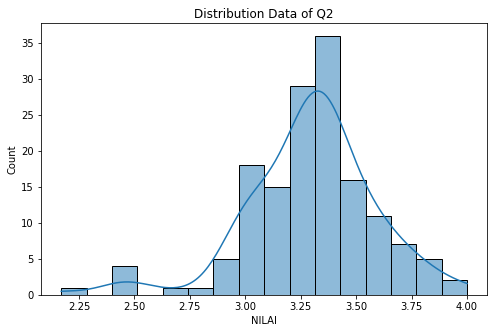

In [ ]:
# For Q2
fig=plt.figure(figsize=(8, 5))
z = df2.loc[df2.PERTANYAAN==2]
sns.histplot(z.NILAI, kde=True).set(title='Distribution Data of Q2')

[Text(0.5, 1.0, 'Distribution Data of Q4')]

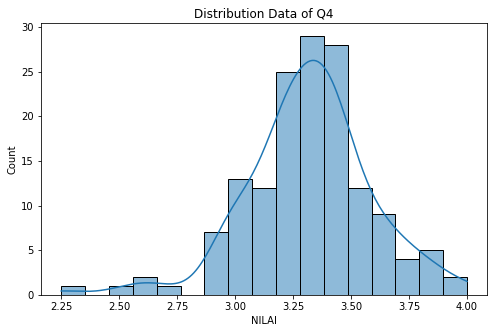

In [ ]:
# For Q4
fig=plt.figure(figsize=(8, 5))
z = df2.loc[df2.PERTANYAAN==4]
sns.histplot(z.NILAI, kde=True).set(title='Distribution Data of Q4')

[Text(0.5, 1.0, 'Distribution Data of Q8')]

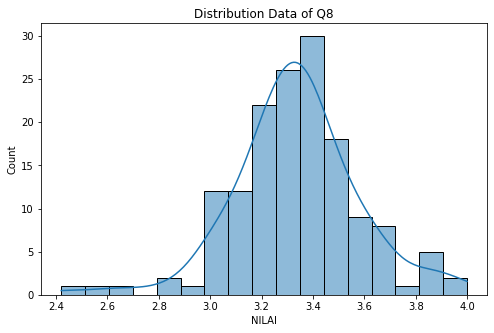

In [ ]:
# For Q8
fig=plt.figure(figsize=(8, 5))
z = df2.loc[df2.PERTANYAAN==8]
sns.histplot(z.NILAI, kde=True).set(title='Distribution Data of Q8')

[Text(0.5, 1.0, 'Distribution Data of Q9')]

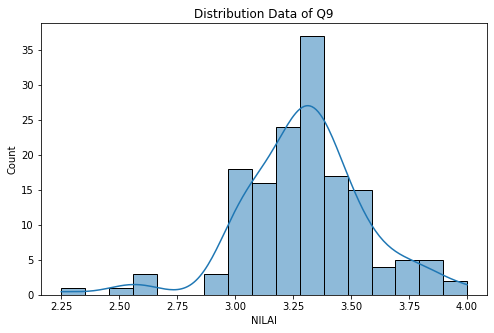

In [ ]:
# For Q9
fig=plt.figure(figsize=(8, 5))
z = df2.loc[df2.PERTANYAAN==9]
sns.histplot(z.NILAI, kde=True).set(title='Distribution Data of Q9')

[Text(0.5, 1.0, 'Distribution Data of Q11')]

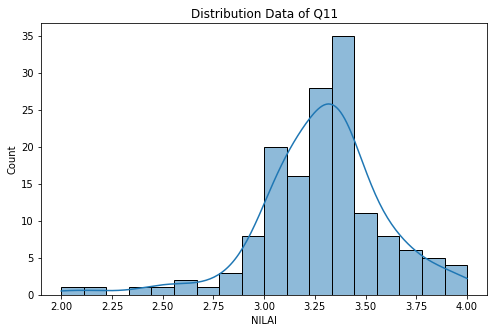

In [ ]:
# For Q11
fig=plt.figure(figsize=(8, 5))
z = df2.loc[df2.PERTANYAAN==11]
sns.histplot(z.NILAI, kde=True).set(title='Distribution Data of Q11')

[Text(0.5, 1.0, 'Distribution Data of Q12')]

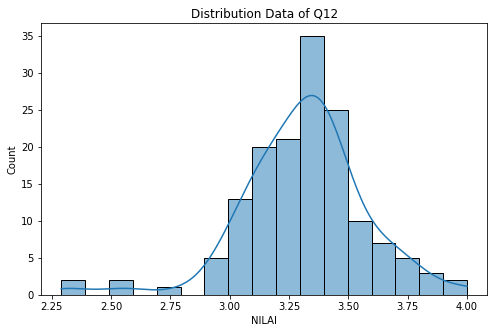

In [ ]:
# For Q12
fig=plt.figure(figsize=(8, 5))
z = df2.loc[df2.PERTANYAAN==12]
sns.histplot(z.NILAI, kde=True).set(title='Distribution Data of Q12')

[Text(0.5, 1.0, 'Distribution Data of Q13')]

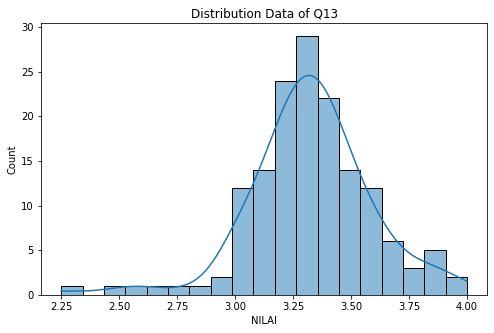

In [ ]:
# For Q13
fig=plt.figure(figsize=(8, 5))
z = df2.loc[df2.PERTANYAAN==13]
sns.histplot(z.NILAI, kde=True).set(title='Distribution Data of Q13')

In [ ]:
dfix.NILAI.describe()

count    51.000000
mean      3.305098
std       0.208263
min       2.640000
25%       3.200000
50%       3.300000
75%       3.415000
max       3.690000
Name: NILAI, dtype: float64

In [ ]:
px.histogram(dfix['NILAI'],
            marginal='box', x = 'NILAI')

# Modelling 2

In [ ]:
lulusSmt = lulusSmt.reset_index()

In [ ]:
lulusSmt.head()

,NIM,SKS,Number of Semester,IPK,KELULUSAN
0,10110310002,145,9,2.782959,TELAT
1,10110310004,145,12,2.983726,TELAT
2,10110310005,145,8,3.728022,TEPAT WAKTU
3,10110310006,145,8,3.073260,TEPAT WAKTU
4,10110310007,145,8,2.872892,TEPAT WAKTU


In [ ]:
Nilai_Dosen = []
for i in range(len(lulusSmt.NIM)) :
    loc_nim =  tes.loc[tes.NIM == lulusSmt.NIM[i]].reset_index(drop=True)
    nilai_dosen = 0
    jumlah = 0
    for k in range(len(loc_nim.KODE_MK)):
        if loc_nim.KODE_MK[k] in mk_list :
            loc_mk = dfix.loc[dfix.KODE_MK == loc_nim.KODE_MK[k]].reset_index(drop=True)
            nilai_dosen += loc_mk.NILAI[0]
            jumlah +=1
    if jumlah > 0 :
        Nilai_Dosen.append((nilai_dosen/jumlah))
    else :
        Nilai_Dosen.append(nilai_dosen)

In [ ]:
lulusSmt['NILAI_DOSEN'] = pd.DataFrame(Nilai_Dosen)

In [ ]:
lulusSmt = lulusSmt.replace(0,np.NaN)
lulusSmt = lulusSmt.dropna()

A new dataframe will be defined which is a combination of Dataset 1 and Dataset 2

In [ ]:
df_merge = lulusSmt.reset_index(drop=True).copy()

In [ ]:
df_merge.head()

,NIM,SKS,Number of Semester,IPK,KELULUSAN,NILAI_DOSEN
0,10110310017,144,11,2.895036,TELAT,3.420000
1,10110310026,145,13,2.903724,TELAT,3.293333
2,10110310032,148,13,2.923312,TELAT,3.085000
3,10110310034,144,13,2.758622,TELAT,3.190000
4,10110310052,146,12,2.552578,TELAT,3.242000


In [ ]:
df_merge.NILAI_DOSEN.describe()

count    250.000000
mean       3.309517
std        0.062374
min        3.030000
25%        3.281613
50%        3.300077
75%        3.329444
max        3.560000
Name: NILAI_DOSEN, dtype: float64

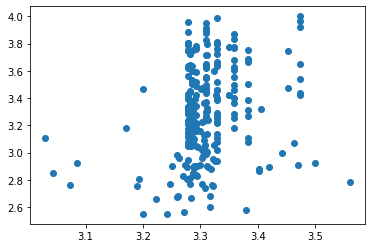

In [ ]:
plt.scatter(df_merge.NILAI_DOSEN,df_merge.IPK)

It can be seen from the scatter-plot visualization above, the data is too piled up and difficult to observe. Therefore, transforming and scaling will be done first.

In [ ]:
df_train = df_merge.copy()

In [ ]:
# Transform
le = LabelEncoder()
df_train = df_train.apply(le.fit_transform)

In [ ]:
# Scaling
scaler = StandardScaler()
scaler.fit(df_train)
scaled_df = pd.DataFrame(scaler.transform(df_train),columns= df_train.columns )

In [ ]:
scaled_df.head()

,NIM,SKS,Number of Semester,IPK,KELULUSAN,NILAI_DOSEN
0,-1.725136,-1.267113,1.356606,-1.281728,-0.63188,1.402068
1,-1.711280,0.234206,2.624462,-1.226302,-0.63188,-0.144227
2,-1.697423,4.738162,2.624462,-1.143163,-0.63188,-1.866238
3,-1.683567,-1.267113,2.624462,-1.558858,-0.63188,-1.795952
4,-1.669710,1.735524,1.990534,-1.711280,-0.63188,-1.620236


Ellbow-method will be used to determine the value of k (number of clusters)

In [ ]:
SSE = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(scaled_df[['NILAI_DOSEN','IPK']])
    SSE.append(km.inertia_)

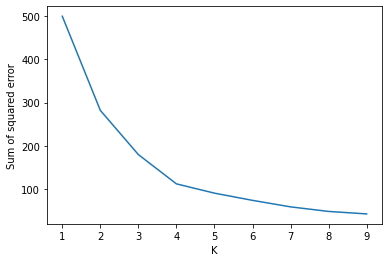

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, SSE)

Based on the plot and elbow-method, it will choose k amounting to 4

In [ ]:
km = KMeans(n_clusters=4, init='k-means++')
y_predicted = km.fit_predict(scaled_df[['NILAI_DOSEN','IPK']])
y_predicted

array([1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 1, 1, 3, 1, 2, 2, 1, 2, 2, 2, 3, 2, 1, 2, 1, 2, 3, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 3, 1, 3, 2, 3, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 3, 1, 2, 3, 1, 1, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 0,
       3, 0, 3, 3, 0, 2, 0, 3, 2, 3, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0,
       3, 3, 0, 3, 3, 2, 3, 1, 3, 2, 2, 0, 1, 3, 0, 0, 3, 3, 3, 0, 0, 0,
       2, 0, 2, 0, 3, 3, 3, 3, 0, 0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 2, 0, 3, 2, 0, 3, 2, 0, 3, 0, 2, 3, 0, 3, 0,
       2, 0, 3, 2, 2, 0, 3, 1, 0, 2, 0, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0,
       2, 0, 0, 0, 0, 2, 2, 1], dtype=int32)

In [ ]:
scaled_df['cluster']=y_predicted
scaled_df.head()

,NIM,SKS,Number of Semester,IPK,KELULUSAN,NILAI_DOSEN,cluster
0,-1.725136,-1.267113,1.356606,-1.281728,-0.63188,1.402068,1
1,-1.711280,0.234206,2.624462,-1.226302,-0.63188,-0.144227,3
2,-1.697423,4.738162,2.624462,-1.143163,-0.63188,-1.866238,3
3,-1.683567,-1.267113,2.624462,-1.558858,-0.63188,-1.795952,3
4,-1.669710,1.735524,1.990534,-1.711280,-0.63188,-1.620236,3


In [ ]:
km.cluster_centers_

array([[-0.77125362,  0.68249425],
       [ 0.81677618, -0.8108582 ],
       [ 0.96949821,  1.01478612],
       [-0.95553017, -0.90443468]])

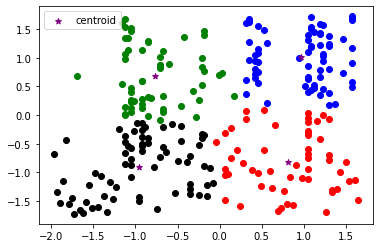

In [ ]:
df1 = scaled_df[scaled_df.cluster==0]
df2 = scaled_df[scaled_df.cluster==1]
df3 = scaled_df[scaled_df.cluster==2]
df4 = scaled_df[scaled_df.cluster==3]

plt.scatter(df1.NILAI_DOSEN,df1.IPK,color='green')
plt.scatter(df2.NILAI_DOSEN,df2.IPK,color='red')
plt.scatter(df3.NILAI_DOSEN,df3.IPK,color='blue')
plt.scatter(df4.NILAI_DOSEN,df4.IPK,color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()